In [43]:
# Data manipulation and file handling
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def read_csv_to_pkl_and_rename(path, class_name):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)

        # Ensure it's a file and not a directory
        if os.path.isfile(file_path):
            if file.endswith(".csv"):
                # Read the CSV file
                data = pd.read_csv(file_path)

                # Determine the suffix based on the file name
                if "Accelerometer" in file:
                    suffix = "_acc"
                elif "Gyroscope" in file:
                    suffix = "_gyro"
                else:
                    continue  # Skip files that are neither Accelerometer nor Gyroscope

                # Create new filenames with the suffix
                new_base_name = f"{class_name}{suffix}"
                pkl_file_path = os.path.join(path, f"{new_base_name}.pkl")
                new_csv_file_path = os.path.join(path, f"{new_base_name}.csv")

                # Save the data as a pickle file
                data.to_pickle(pkl_file_path)

                # Rename the CSV file
                os.rename(file_path, new_csv_file_path)

                print(
                    f"Converted {file} to {new_base_name}.pkl and renamed CSV to {new_base_name}.csv"
                )


# Example usage
# read_csv_to_pkl_and_rename("/Users/ahmedabd/Desktop/ML/lab2/valid/Lab2run5", "run5")
# Example usage

In [45]:
def combine_pickles_with_class(path, class_name):
    """
    Combines acc and gyro pickle files for a given class into a single DataFrame.

    Parameters:
    - path (str): Directory path containing the pickle files.
    - class_name (str): The class name to filter files (e.g., 'jump').

    Returns:
    - pd.DataFrame: Combined DataFrame with acc, gyro data and class column.
    """
    # Initialize lists to hold acc and gyro files
    acc_files = []
    gyro_files = []

    # List all files in the directory
    for file in os.listdir(path):
        if file.startswith(class_name) and file.endswith("_acc.pkl"):
            acc_files.append(file)
        elif file.startswith(class_name) and file.endswith("_gyro.pkl"):
            gyro_files.append(file)

    # Create a list to hold the combined data for all the files
    combined_data_list = []

    # Rename columns appropriately for acc and gyro DataFrames
    for i in range(len(acc_files)):
        acc_df = pd.read_pickle(path + acc_files[i])
        gyro_df = pd.read_pickle(path + gyro_files[i])

        # Drop the first column (assumed to be an index or unneeded)

        # if num of columns is 4, then drop the first column
        if len(acc_df.columns) == 4:
            acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
            gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

        # Rename columns
        acc_df.columns = ["ax", "ay", "az"]
        gyro_df.columns = ["gx", "gy", "gz"]

        # Combine acc and gyro DataFrames horizontally
        combined_df = pd.concat([acc_df, gyro_df], axis=1)

        # Add class column
        combined_df["class"] = class_name

        # Append the combined DataFrame to the list
        combined_data_list.append(combined_df)

    # Concatenate all DataFrames vertically to get the final combined DataFrame
    final_df = pd.concat(combined_data_list, ignore_index=True)

    return final_df


# test the function
# combine_pickles_with_class("train/pkl_files/", "spain")

In [46]:
# # train, valid, test
data_type = "train"

# # print the description of the data
jump_data = combine_pickles_with_class(f"{data_type}/pkl_files/", "jump")
walk_data = combine_pickles_with_class(f"{data_type}/pkl_files/", "walk")
spain_data = combine_pickles_with_class(f"{data_type}/pkl_files/", "spain")
run_data = combine_pickles_with_class(f"{data_type}/pkl_files/", "run")

# # save the data as pickle files
# jump_data.to_pickle(f"{data_type}/jump_data_{data_type}.pkl")
# walk_data.to_pickle(f"{data_type}/walk_data_{data_type}.pkl")
# spain_data.to_pickle(f"{data_type}/spain_data_{data_type}.pkl")
# run_data.to_pickle(f"{data_type}/run_data_{data_type}.pkl")

# # save all the data as in a single variable
# all_data = pd.concat([jump_data, walk_data, spain_data, run_data], ignore_index=True)
# all_data.to_pickle(f"{data_type}/all_data_{data_type}.pkl")

In [8]:
# create a function that plot the boxplot of the data
def plot_boxplot(data, name):
    # create a figure and axis
    fig, ax = plt.subplots()
    # create a boxplot
    sns.boxplot(data=data, ax=ax)
    # set the title
    ax.set_title("Boxplot of the " + name + " data")

    # stratch the plot and show the grid
    plt.tight_layout()
    plt.grid()

    # show the plot
    plt.show()

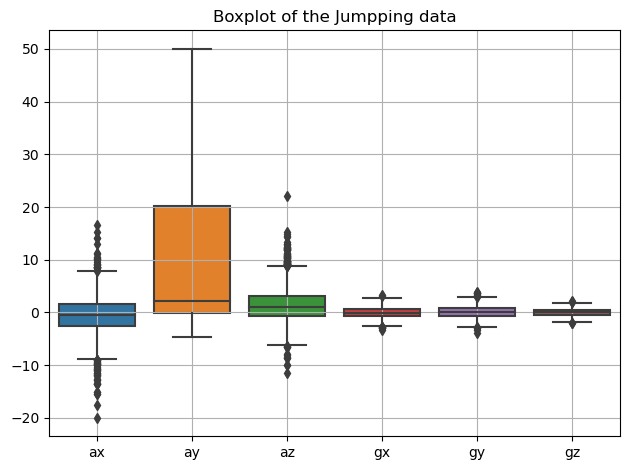

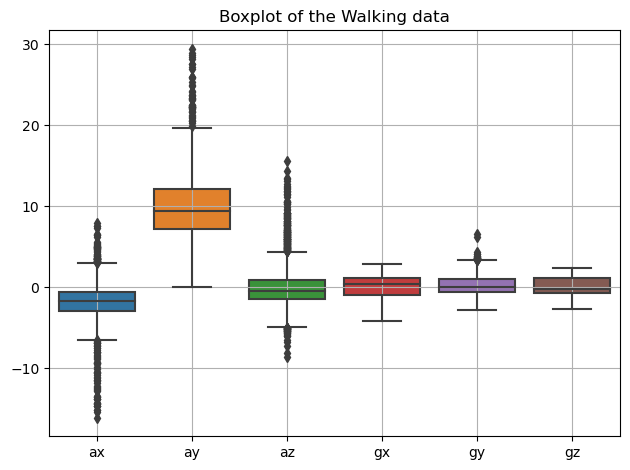

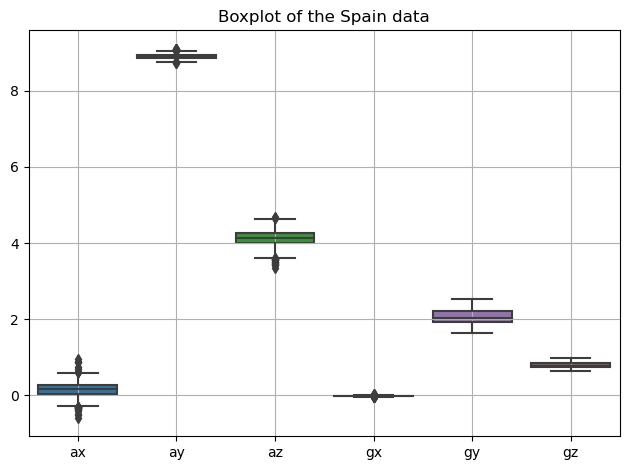

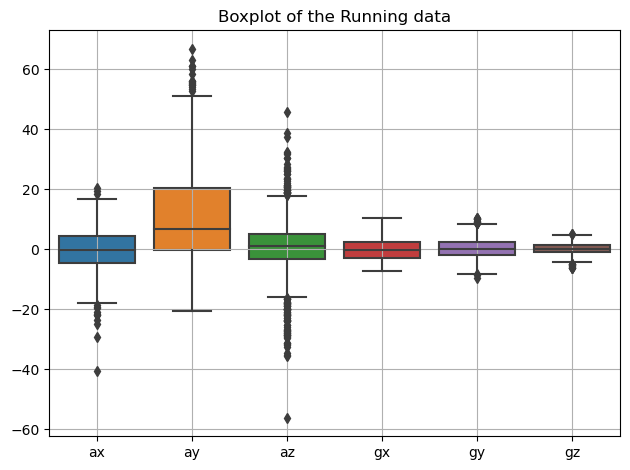

In [9]:
# test the function
plot_boxplot(jump_data, "Jumpping")
plot_boxplot(walk_data, "Walking")
plot_boxplot(spain_data, "Spain")
plot_boxplot(run_data, "Running")

In [10]:
# print the description of the data
print(jump_data.describe())
print(walk_data.describe())
print(spain_data.describe())
print(run_data.describe())

                ax           ay           az           gx           gy  \
count  1497.000000  1497.000000  1497.000000  1497.000000  1497.000000   
mean     -0.606415     9.696224     1.491194    -0.027706     0.105867   
std       3.815826    12.943506     3.507579     0.978105     1.045827   
min     -20.000209    -4.639602   -11.508368    -3.302589    -3.831720   
25%      -2.637066    -0.141606    -0.614173    -0.688903    -0.605227   
50%      -0.551304     2.184258     1.056503    -0.038502     0.111020   
75%       1.524430    20.121757     3.144062     0.673918     0.820988   
max      16.572637    50.020881    22.081631     3.277794     3.909423   

                gz  
count  1497.000000  
mean      0.016260  
std       0.679092  
min      -1.941643  
25%      -0.448409  
50%       0.056624  
75%       0.480371  
max       2.134748  
                ax           ay           az           gx           gy  \
count  1499.000000  1499.000000  1499.000000  1499.000000  1499.000000

### Use the describe method for all four classes. What are the differences between all classes? What statistic measure is different for the classes?


#### Accelerometer Data (ax, ay, az):

- **Jumping:**
  - **ax:** Range approximately from -20 to 20.
  - **ay:** Median around 2.6, reflecting high upward movements; range from -10 to about 50.
  - **az:** Broad spread from -14 to 24, indicating significant vertical movements.
- **Walking:**
  - **ax:** Narrower range from about -18 to 9, reflecting less lateral movement.
  - **ay:** Median around 9.5, showing consistent upward acceleration; range is narrower compared to jumping.
  - **az:** Centered around zero, range from -11 to 22, less variable than jumping.
- **Spain Data:**
  - **ax:** Very consistent, range from about -0.94 to 1.05.
  - **ay:** Median around 9.3, minimal variability; range is very narrow from about 8.5 to 9.6.
  - **az:** Consistent vertical movements, range from 2.2 to 5.3.
- **Running:**
  - **ax:** Wide range from about -42 to 20, indicating more intense lateral movements.
  - **ay:** Highest median around 10.5, suggesting strong upward acceleration, with a very broad range from -21 to 86.
  - **az:** A highly variable range from -50 to 65, showing significant vertical movement during running.

#### Gyroscope Data (gx, gy, gz):

- **Jumping:**
  - **gx, gy, gz:** Wide range with medians around zero, indicating varied rotations returning to neutral orientation. Gyro z has a range from -3.23 to 2.84.
- **Walking:**
  - **gx:** Range from -4.53 to 3.55, indicating moderate variability.
  - **gy:** Positive bias with a range from -3.59 to 5.62, reflecting directional rotation.
  - **gz:** Similar to gx with a range from -2.47 to 2.80.
- **Spain Data:**
  - **gx, gy, gz:** Minimal movement, gy notably stable with range from about 0.86 to 3.27.
- **Running:**
  - **gx:** Broad range from -6.92 to 10.05, showing significant rotational movement.
  - **gy:** Similarly broad range from -9.83 to 13.65, reflecting rapid directional changes.
  - **gz:** Moderate variation with a range from -5.23 to 5.21, indicating notable rotational movement along the z-axis.

### Statistical Differences:

- **Standard Deviation**:
  - **Jumping:** High across ax and ay (3.8 and 12.7 respectively), indicating erratic movement.
  - **Walking:** Lower compared to jumping, around 2.7 for ax and 4.9 for ay.
  - **Spain:** Extremely low, about 0.21 for ax and 0.27 for ay, showing uniformity.
  - **Running:** Highest variability with ax, ay, and az having much broader standard deviations (6.09 for ax, 14.57 for ay), indicating vigorous, high-energy movements.

### Summary:

- **Jumping** displays the highest variability in both accelerometer and gyroscope data, suggesting dynamic and vigorous activity.
- **Walking** shows consistent patterns typical of regular, repetitive motion, but with less intensity and variability than jumping.
- **Spain** activity is characterized by highly controlled, minimal movements, making it distinct in its low variability and narrow ranges. This could indicate a more static or uniform set of actions within this dataset.
- **Running** exhibits the most intense and erratic data in both accelerometer and gyroscope metrics, with wide ranges and high standard deviations, reflecting the dynamic and energetic nature of running.

These metrics and values highlight how different activities can be distinguished by their sensor data signatures, useful for applications in motion analysis and activity recognition.


### Why do you have these irregularities in your recordings? Or maybe you do not, how come?

I don't have any irregularities in my recordings because the data was recorded with a delay. This delay was intentionally added to avoid capturing any unwanted or noise data that could have occurred during sensor stabilization.


In [11]:
def clean_data_and_combined(acc_file, gyro_file, start, end):

    # Read the accelerometer and gyroscope pickle files
    acc_df = pd.read_pickle(acc_file)
    gyro_df = pd.read_pickle(gyro_file)

    # Drop
    acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
    gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

    # Rename columns
    acc_df.columns = ["ax", "ay", "az"]
    gyro_df.columns = ["gx", "gy", "gz"]

    # Combine acc and gyro DataFrames horizontally
    combined_df = pd.concat([acc_df, gyro_df], axis=1)

    # Remove the specified number of samples from the beginning and end
    cleaned_df = combined_df.iloc[start:-end]

    return cleaned_df


# test the function

data = clean_data_and_combined(
    "train/pkl_files/jump3_acc.pkl", "train/pkl_files/jump3_gyro.pkl", 100, 100
)
# data.describe()


# plot the data
# plot_boxplot(data)

In [12]:
def clean_data(acc_file, gyro_file, start, end):

    # Read the accelerometer and gyroscope pickle files
    acc_df = pd.read_pickle(acc_file)
    gyro_df = pd.read_pickle(gyro_file)

    # Drop
    acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
    gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

    # Rename columns
    acc_df.columns = ["ax", "ay", "az"]
    gyro_df.columns = ["gx", "gy", "gz"]

    # Remove the specified number of samples from the beginning and end
    acc = acc_df.iloc[start:-end]
    gryo = gyro_df.iloc[start:-end]

    return acc, gryo

In [13]:
def clean_data_save_tofile(path, class_name):
    # Initialize lists to hold acc and gyro files
    acc_files = []
    gyro_files = []

    # List all files in the directory
    for file in os.listdir(path):
        if file.startswith(class_name) and file.endswith("_acc.pkl"):
            acc_files.append(file)
        elif file.startswith(class_name) and file.endswith("_gyro.pkl"):
            gyro_files.append(file)

    # Path to save cleaned data
    save_path = os.path.join("clean_data", "valid")
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Declare variables to hold the data
    acc = pd.DataFrame()
    gyro = pd.DataFrame()

    # Rename columns appropriately for acc and gyro DataFrames
    for i in range(len(acc_files)):
        # Load and clean the data
        acc, gyro = clean_data(
            os.path.join(path, acc_files[i]),
            os.path.join(path, gyro_files[i]),
            250,
            250,
        )

        # Add class column
        # acc["class"] = class_name
        # gyro["class"] = class_name

        # Save the cleaned data to the file in folder clean_data/train
        acc.to_pickle(os.path.join(save_path, acc_files[i]))
        gyro.to_pickle(os.path.join(save_path, gyro_files[i]))


# Test the function
# Make sure you have `clean_data` function defined in your project
# clean_data_save_tofile("train/pkl_files/", "jump")
# clean_data_save_tofile("train/pkl_files/", "walk")
# clean_data_save_tofile("train/pkl_files/", "spain")
# clean_data_save_tofile("valid/pkl_files/", "run")

In [48]:
data_type = "train"

# # print the description of the data
jump_data_cleaned = combine_pickles_with_class(f"clean_data/{data_type}/", "jump")
walk_data_cleaned = combine_pickles_with_class(f"clean_data/{data_type}/", "walk")
spain_data_cleaned = combine_pickles_with_class(f"clean_data/{data_type}/", "spain")
run_data_cleaned = combine_pickles_with_class(f"clean_data/{data_type}/", "run")

# save all the data as in a single variable
# all_data = pd.concat(
#     [jump_data_cleaned, walk_data_cleaned, spain_data_cleaned, run_data_cleaned],
#     ignore_index=True,
# )
# all_data.to_pickle(f"clean_data/{data_type}/all_data_{data_type}.pkl")

In [15]:
# print the description of the data
print(jump_data_cleaned.describe())
print(walk_data_cleaned.describe())
print(spain_data_cleaned.describe())
print(run_data_cleaned.describe())

                ax           ay           az           gx           gy  \
count  2995.000000  2995.000000  2995.000000  2995.000000  2995.000000   
mean     -0.680456     9.731575     1.615512     0.017118    -0.051256   
std       3.906258    13.128988     3.795510     1.216278     1.149123   
min     -22.638024    -5.275629   -14.282250    -3.740479    -6.181140   
25%      -2.628010     0.103285    -0.726664    -0.826722    -0.728597   
50%      -0.528701     2.226919     0.998873    -0.096901    -0.113273   
75%       1.437610    21.984333     3.376753     0.834776     0.647794   
max      18.140177    51.539623    24.380101     3.184394     4.189170   

                gz  
count  2995.000000  
mean     -0.013776  
std       0.804963  
min      -3.184638  
25%      -0.512297  
50%       0.052526  
75%       0.486728  
max       2.843425  
                ax           ay           az           gx           gy  \
count  2997.000000  2997.000000  2997.000000  2997.000000  2997.000000

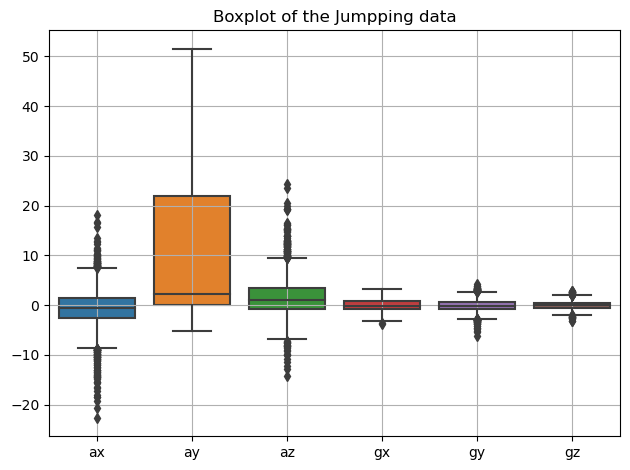

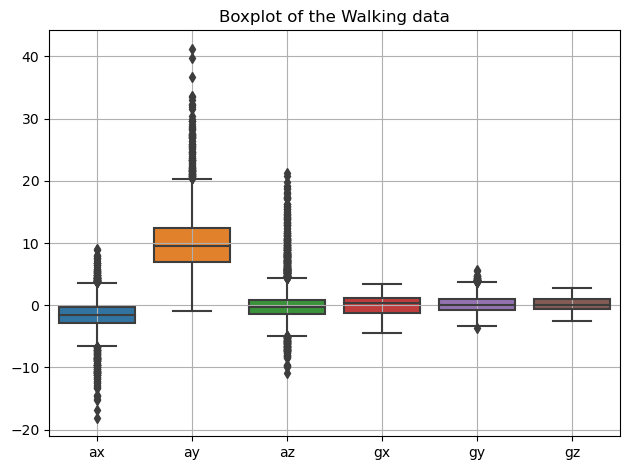

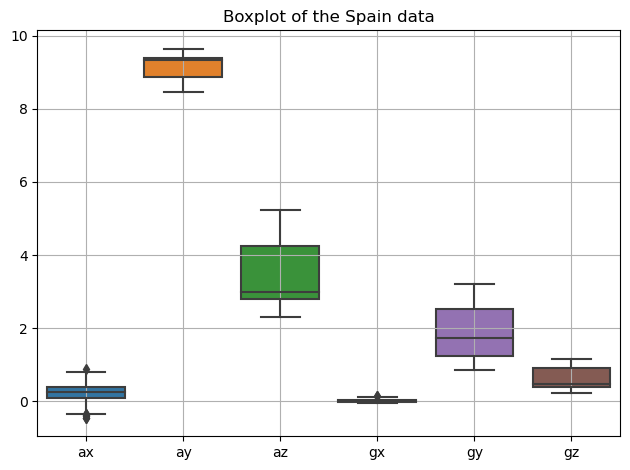

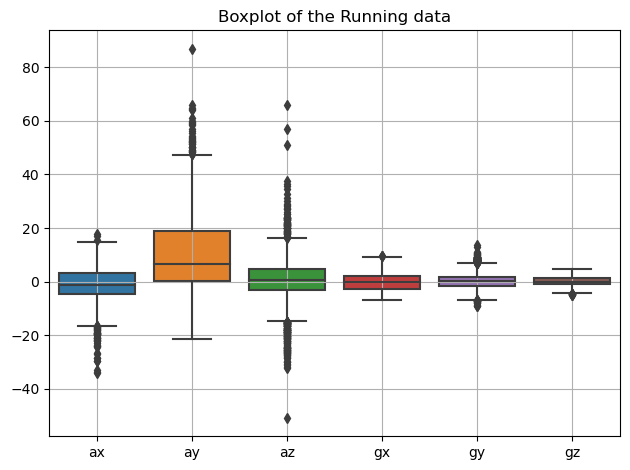

In [16]:
# plot the data
plot_boxplot(jump_data_cleaned, "Jumpping")
plot_boxplot(walk_data_cleaned, "Walking")
plot_boxplot(spain_data_cleaned, "Spain")
plot_boxplot(run_data_cleaned, "Running")

In [19]:
print(jump_data.describe())
print(jump_data_cleaned.describe())

                ax           ay           az           gx           gy  \
count  1497.000000  1497.000000  1497.000000  1497.000000  1497.000000   
mean     -0.606415     9.696224     1.491194    -0.027706     0.105867   
std       3.815826    12.943506     3.507579     0.978105     1.045827   
min     -20.000209    -4.639602   -11.508368    -3.302589    -3.831720   
25%      -2.637066    -0.141606    -0.614173    -0.688903    -0.605227   
50%      -0.551304     2.184258     1.056503    -0.038502     0.111020   
75%       1.524430    20.121757     3.144062     0.673918     0.820988   
max      16.572637    50.020881    22.081631     3.277794     3.909423   

                gz  
count  1497.000000  
mean      0.016260  
std       0.679092  
min      -1.941643  
25%      -0.448409  
50%       0.056624  
75%       0.480371  
max       2.134748  
                ax           ay           az           gx           gy  \
count  2995.000000  2995.000000  2995.000000  2995.000000  2995.000000

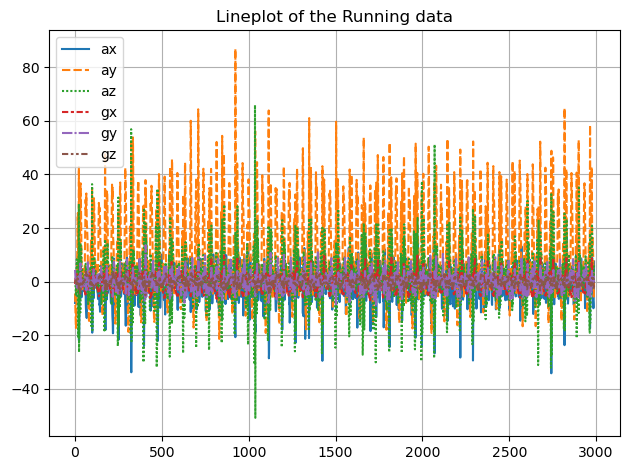

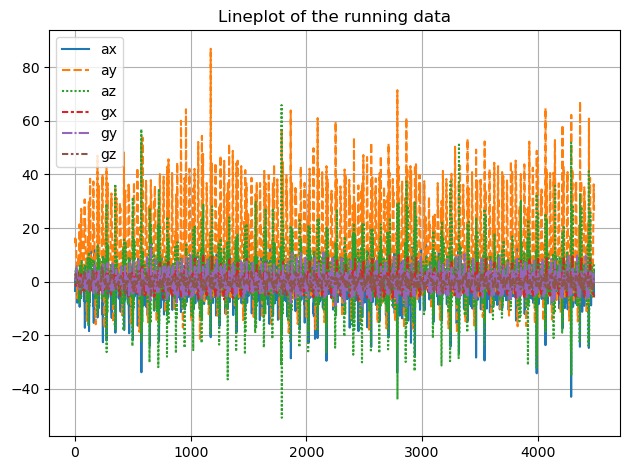

In [52]:
# plot the data with time


def plot_data_with_time(data, name):
    # create a figure and axis
    fig, ax = plt.subplots()
    # create a boxplot
    sns.lineplot(data=data, ax=ax)
    # set the title
    ax.set_title("Lineplot of the " + name + " data")

    # stratch the plot and show the grid
    plt.tight_layout()
    plt.grid()

    # show the plot
    plt.show()


# test the function
plot_data_with_time(run_data_cleaned, "Running")
plot_data_with_time(run_data, "running")